In [1]:
import os
import sys
from pathlib import Path

import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import scvelo as scv
import cellrank as cr
import anndata as ad
from cellrank.kernels import ConnectivityKernel, VelocityKernel
from cellrank.estimators import GPCCA
#from tueplots import bundles
#from tueplots import axes

In [2]:
cr.logging.print_versions()

cellrank==1.5.1+g525b847 scanpy==1.9.1 anndata==0.8.0 numpy==1.23.4 numba==0.56.4 scipy==1.10.0 pandas==1.5.2 pygpcca==1.0.4 scikit-learn==1.2.0 statsmodels==0.13.5 scvelo==0.2.5 pygam==0.8.0 matplotlib==3.6.2 seaborn==0.12.2


In [3]:
org_adata = sc.read("/lustre/groups/ml01/workspace/monge_velo/data/benchmarks/larry_invitro/larry_invitro_adata_sub_raw.h5ad")
org_adata

AnnData object with n_obs × n_vars = 49302 × 23420
    obs: 'Library', 'Cell barcode', 'time_info', 'Starting population', 'state_info', 'Well', 'SPRING-x', 'SPRING-y'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    uns: 'data_des'
    obsm: 'X_clone', 'X_emb'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [4]:
leave_out = [2]
adata = org_adata[~org_adata.obs['time_info'].isin(leave_out)].copy()

adata.obs = adata.obs.loc[:, ['time_info', 'state_info']]
adata.var = adata.var[[]]
adata.uns = {}

sc.pp.log1p(adata)

adata

AnnData object with n_obs × n_vars = 44664 × 23420
    obs: 'time_info', 'state_info'
    uns: 'log1p'
    obsm: 'X_clone', 'X_emb'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [5]:
adata_four = adata[adata.obs['time_info'] == 4.0, :].copy()sc.pp.pca(adata_four, n_comps=50)
scv.pp.moments(adata_four)
scv.tl.recover_dynamics(adata_four, n_jobs=80)
scv.tl.velocity(adata_four, mode = 'dynamical')
adata_six = adata[adata.obs['time_info'] == 6.0, :].copy()

In [6]:
sc.pp.pca(adata_four, n_comps=50)
scv.pp.moments(adata_four)
scv.tl.recover_dynamics(adata_four, n_jobs=80)
scv.tl.velocity(adata_four, mode = 'dynamical')

Normalized count data: spliced, unspliced.
computing neighbors
    finished (0:00:33) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:07) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 80/96 cores)
or disable the progress bar using `show_progress_bar=False`.


/home/icb/jonas.flor/miniconda3/envs/neuralBenchmark/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
/home/icb/jonas.flor/miniconda3/envs/neuralBenchmark/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
/home/icb/jonas.flor/miniconda3/envs/neuralBenchmark/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the ex

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
/home/icb/jonas.flor/miniconda3/envs/neuralBenchmark/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
/home/icb/jonas.flor/miniconda3/envs/neuralBenchmark/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
/home/icb/jonas.flor/miniconda3/envs/neuralBenchmark/lib/python3.9/site-packages

    finished (0:45:51) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:28) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [7]:
sc.pp.pca(adata_six, n_comps=50)
scv.pp.moments(adata_six)
scv.tl.recover_dynamics(adata_six, n_jobs=80)
scv.tl.velocity(adata_six, mode = 'dynamical')

Normalized count data: spliced, unspliced.
computing neighbors
    finished (0:00:07) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:14) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 80/96 cores)


/home/icb/jonas.flor/miniconda3/envs/neuralBenchmark/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/home/icb/jonas.flor/miniconda3/envs/neuralBenchmark/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
/home/icb/jonas.flor/miniconda3/envs/neuralBenchmark/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Numba: Attempted to

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
/home/icb/jonas.flor/miniconda3/envs/neuralBenchmark/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
/home/icb/jonas.flor/miniconda3/envs/neuralBenchmark/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
/home/icb/jonas.flor/miniconda3/envs/neuralBenchmark/lib/python3.9/site-packages

    finished (1:48:28) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:01:04) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [15]:
adata = ad.concat([adata_four, adata_six])
sc.pp.neighbors(adata)
scv.tl.umap(adata)
adata

AnnData object with n_obs × n_vars = 44664 × 23420
    obs: 'time_info', 'state_info', 'n_counts'
    uns: 'neighbors', 'umap'
    obsm: 'X_clone', 'X_emb', 'X_pca', 'X_umap'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced', 'Ms', 'Mu', 'fit_t', 'fit_tau', 'fit_tau_', 'velocity', 'velocity_u'
    obsp: 'distances', 'connectivities'

In [3]:
adata = sc.read("/home/icb/jonas.flor/precomputed_data/scvelo_larry_pre.h5ad")
adata

AnnData object with n_obs × n_vars = 44664 × 23420
    obs: 'time_info', 'state_info', 'n_counts', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition'
    uns: 'coarse_fwd', 'eigendecomposition_fwd', 'neighbors', 'schur_matrix_fwd', 'umap', 'velocity_graph'
    obsm: 'X_clone', 'X_emb', 'X_pca', 'X_umap', 'schur_vectors_fwd', 'velocity_emb', 'velocity_umap'
    layers: 'Ms', 'Mu', 'ambiguous', 'fit_t', 'fit_tau', 'fit_tau_', 'matrix', 'spliced', 'unspliced', 'velocity', 'velocity_u'
    obsp: 'connectivities', 'distances'

In [4]:
vk = VelocityKernel(adata).compute_transition_matrix()

100%|██████████████████████████████████████████████████████████████████████████| 44664/44664 [00:57<00:00, 782.50cell/s]


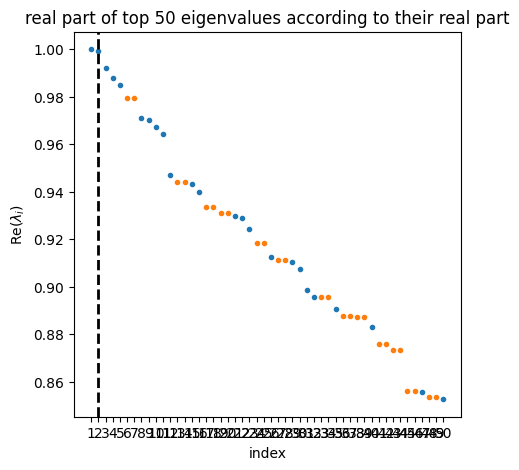

In [5]:
g = GPCCA(vk)
g.compute_schur(n_components=70)
g.plot_spectrum(real_only=True)

In [ ]:
g.compute_macrostates(n_states=60, cluster_key="state_info")
scv.set_figure_params('scvel o', transparent=True, fontsize=20, color_map='viridis')
g.plot_macrostates(discrete=True, basis="umap", legend_loc="right", legend_fontweight='normal', legend_fontsize='12', dpi=250,
                  save='macrostates_scvelo_larry.png')

/home/icb/jonas.flor/miniconda3/envs/neuralBenchmark/lib/python3.9/site-packages/scvelo/plotting/scatter.py:614: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(


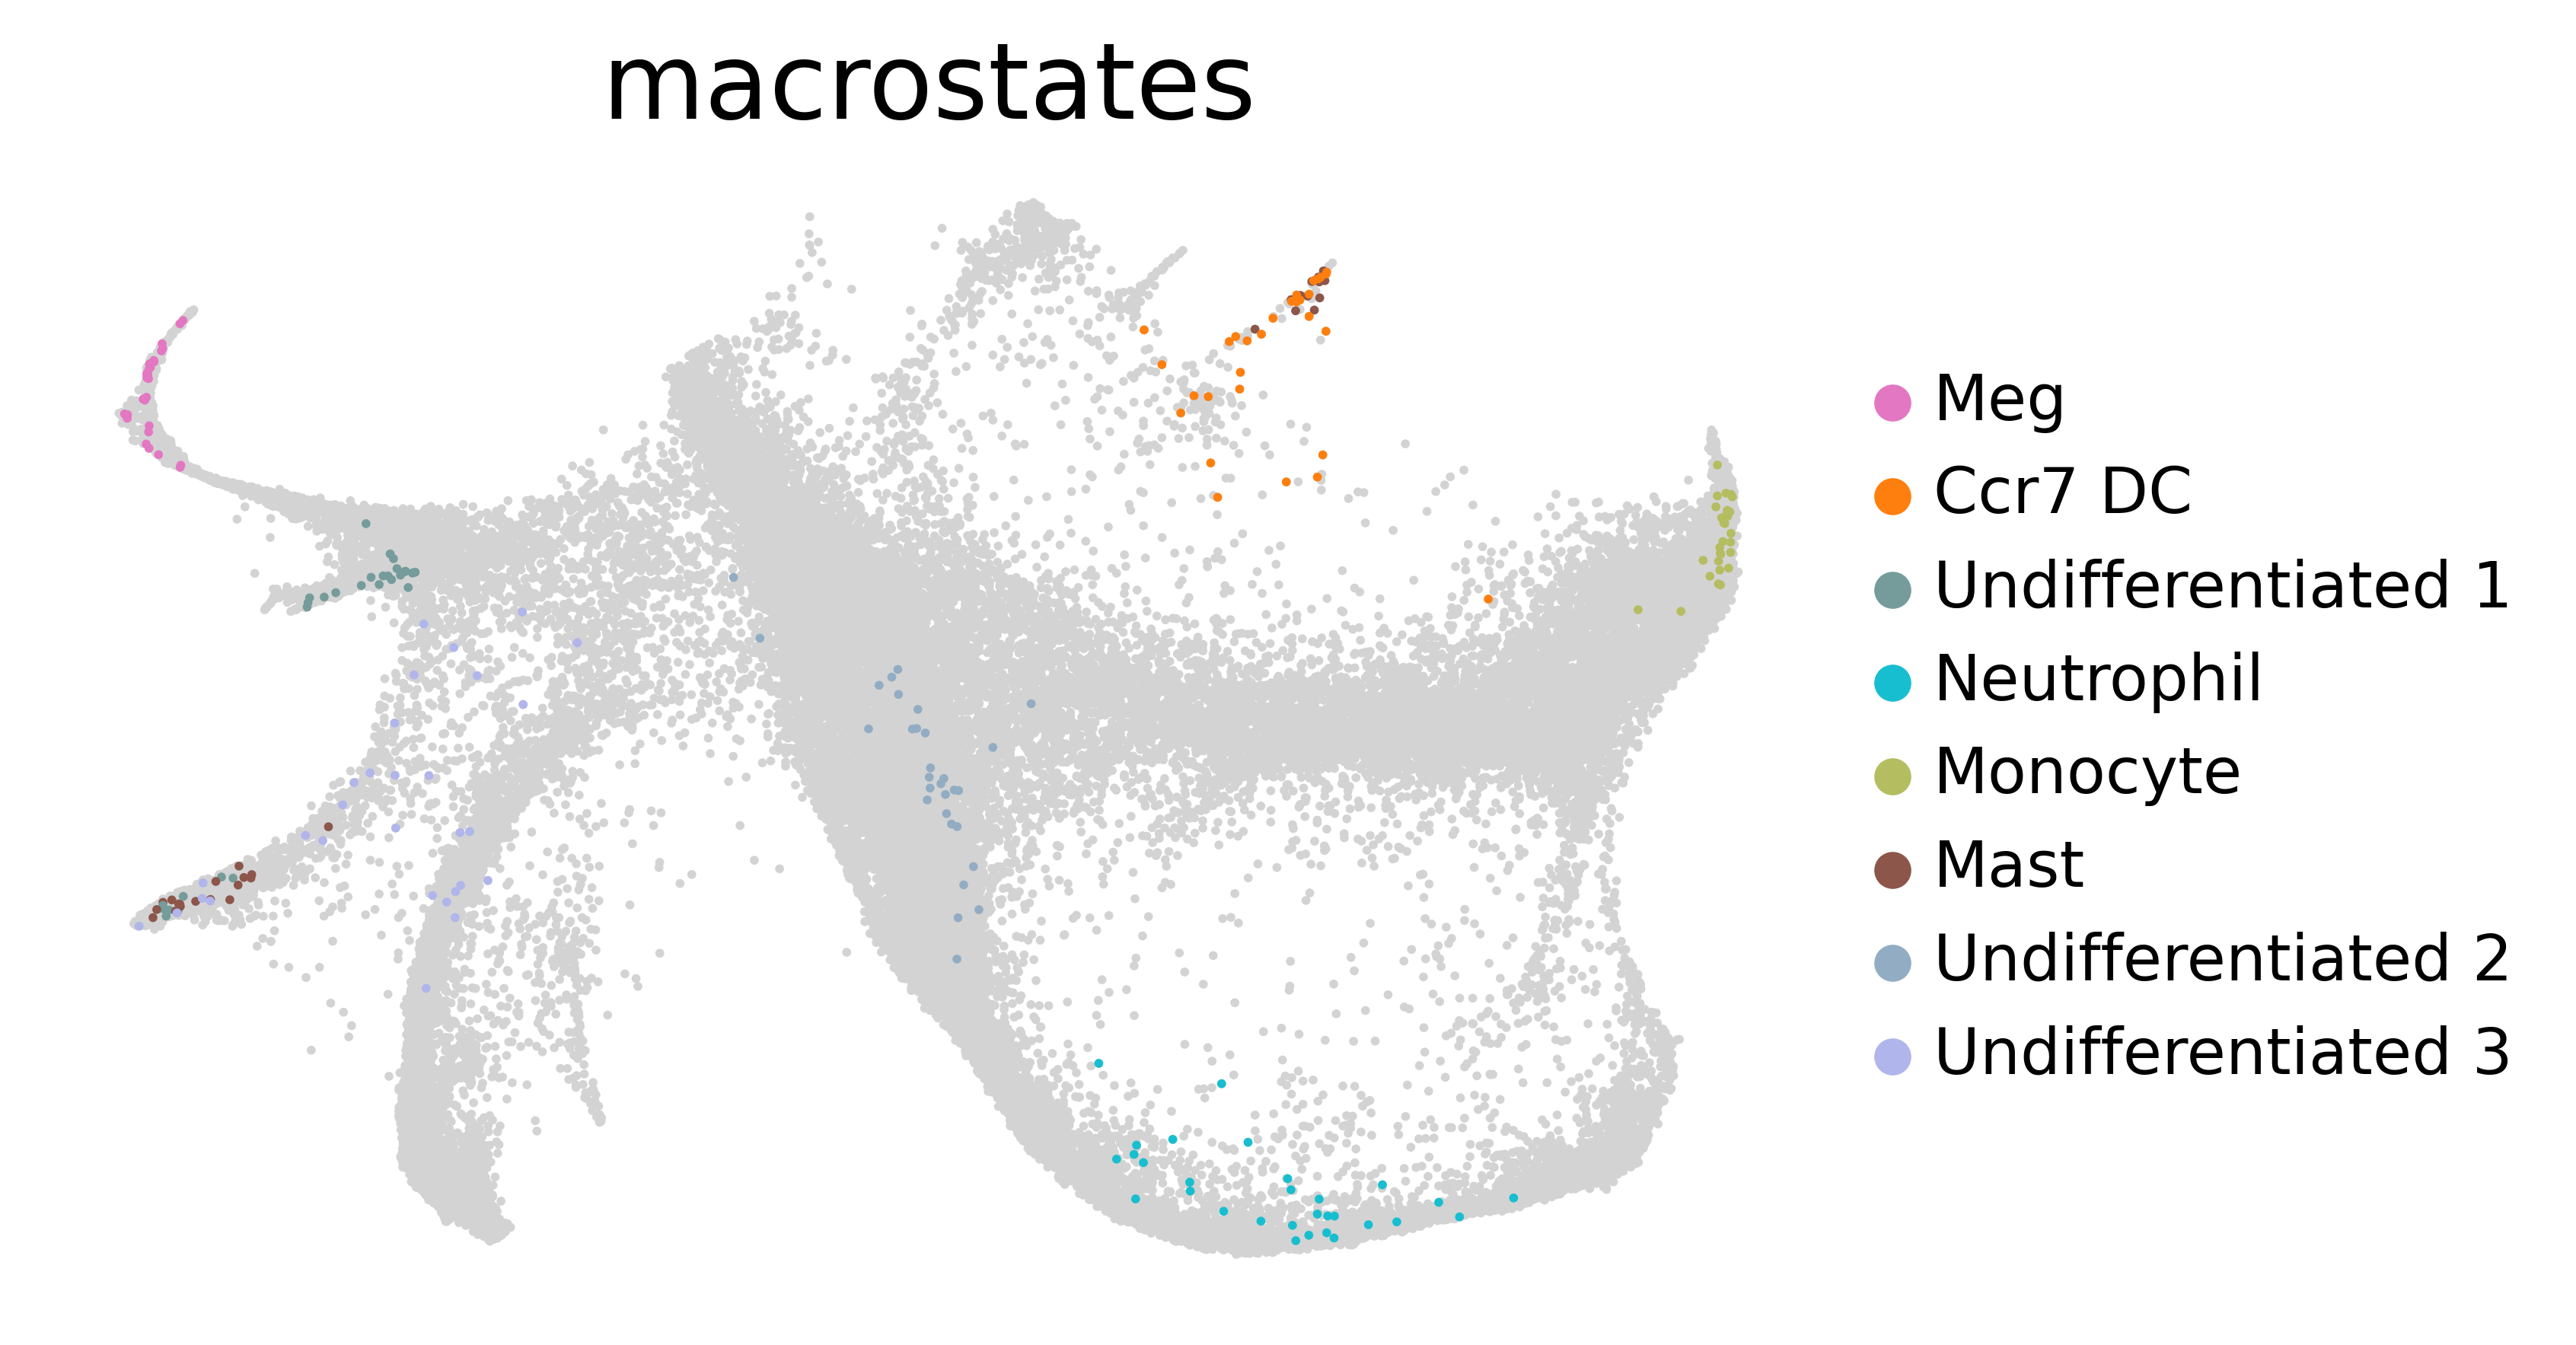

In [23]:
g.plot_macrostates(discrete=True, basis="X_emb", legend_loc="right", legend_fontweight='normal', legend_fontsize='12', dpi=250)

In [ ]:
g.set_terminal_states_from_macrostates(
    [
        "Acinar", "Ductal_1", "Ductal_2", "Alpha", "Beta", "Delta", "Epsilon", 
    ]
)
g.compute_absorption_probabilities(solver="gmres", use_petsc=True, tol=1e-12, preconditioner='ilu', time_to_absorption='all')
g.plot_absorption_probabilities(same_plot=False, basis="umap", perc=[0, 99], ncols=2)

In [ ]:
scv.set_figure_params('scvelo', transparent=True, fontsize=20, color_map='viridis')
cr.pl.aggregate_absorption_probabilities(
    adata,
    mode='heatmap',
    lineages=["Acinar", "Ductal_1", "Ductal_2", "Alpha", "Beta", "Delta", "Epsilon", ],
    cluster_key='celltype',
    clusters=['Acinar', 'Multipotent', 'Tip', 'Ductal', 'Ngn3 High early', 'Ngn3 High late', 'Fev+ Alpha', 'Alpha', 'Fev+ Beta', 'Beta', 'Fev+ Delta', 'Delta', 'Fev+ Epsilon', 'Epsilon'],
    figsize=(17, 6),
    title="",
    save="transprobs_pancreas1415_scvelo.png"
)

<Figure size 600x400 with 0 Axes>

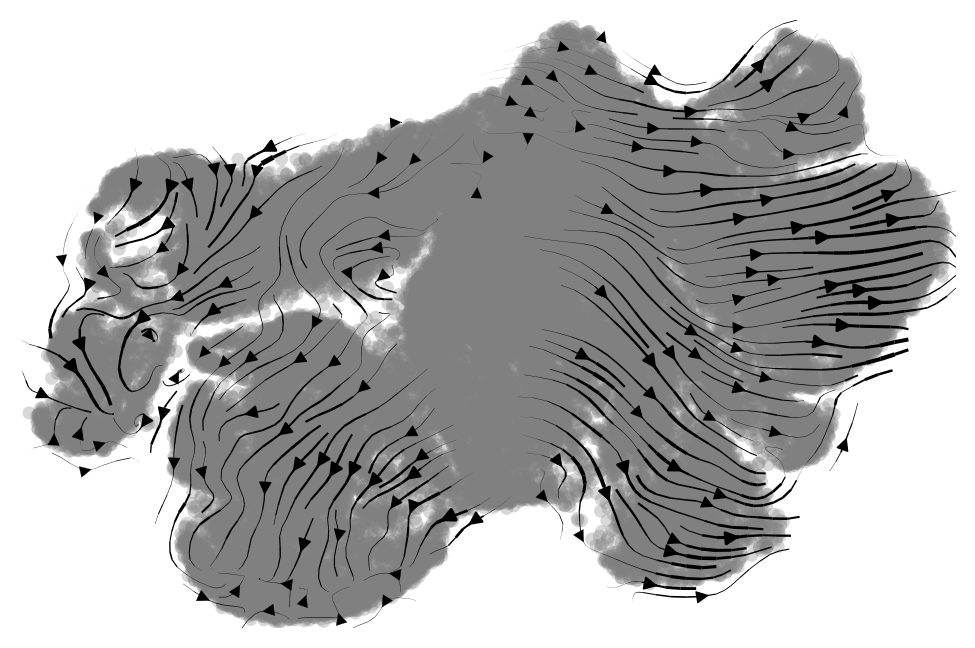

In [25]:
adata.uns["velocity_graph"] = vk.transition_matrix

scv.set_figure_params('scvelo', transparent=True, fontsize=10, dpi_save=400,color_map='viridis')
fig = plt.figure()
ax = scv.pl.velocity_embedding_stream(adata, basis="umap", smooth=0.5, title="")#, legend_loc="none", show=False)
#legend =ax.legend(bbox_to_anchor=[1.25, 1.5], loc='upper center', ncol=6,frameon=True, prop={'size': 18})

computing velocity embedding
    finished (0:00:14) --> added
    'velocity_emb', embedded velocity vectors (adata.obsm)


<Figure size 600x400 with 0 Axes>

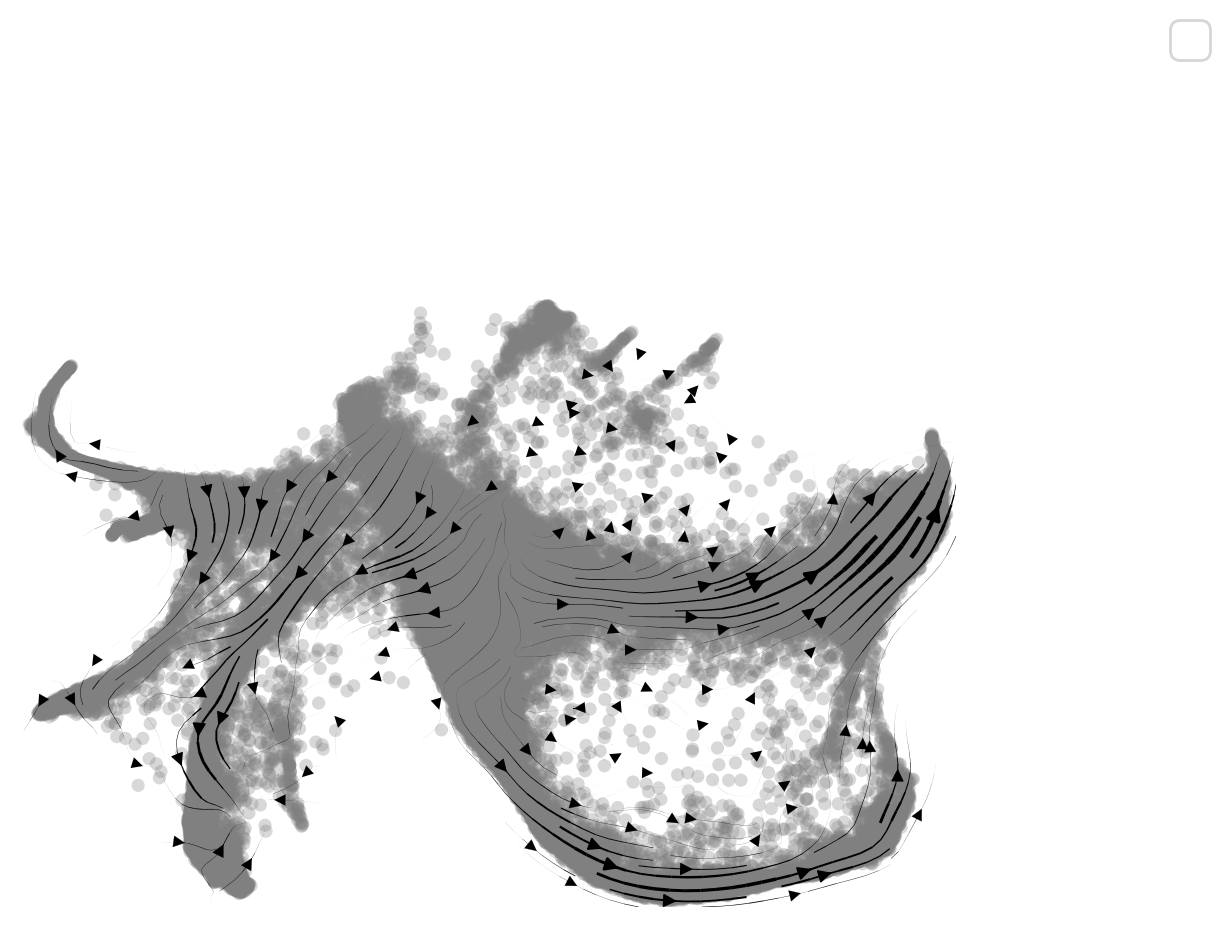

In [20]:
scv.set_figure_params('scvelo', transparent=True, fontsize=10, dpi_save=400,color_map='viridis')
fig = plt.figure()
ax = scv.pl.velocity_embedding_stream(adata, basis="X_emb", smooth=0.5, title="", legend_loc="none", show=False)
legend =ax.legend(bbox_to_anchor=[1.25, 1.5], loc='upper center', ncol=6,frameon=True, prop={'size': 18})

In [21]:
scv.tl.velocity_confidence(adata)

--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)


/home/icb/jonas.flor/miniconda3/envs/neuralBenchmark/lib/python3.9/site-packages/scvelo/plotting/utils.py:869: MatplotlibDeprecationWarning: The draw_all function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use fig.draw_without_rendering() instead.
  cb.draw_all()


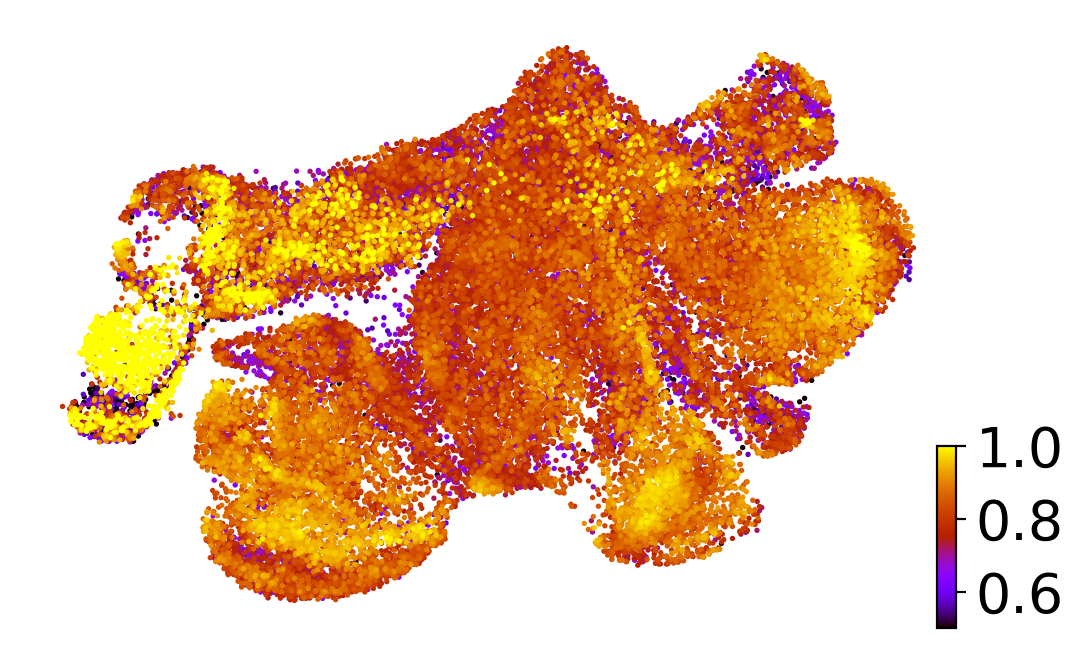

In [22]:
scv.set_figure_params('scvelo', fontsize=20)
scv.settings.presenter_view = False
scv.pl.scatter(adata, color='velocity_confidence',
               perc=[2, 98],
               cmap='gnuplot',
               vmid=0.75,
               rescale_color=[0.5, 1.0],
               size=15,
               title="",
               #save="velconf_pancreas1415_scvelo.png"
              )

In [9]:
#adata.write("/home/icb/jonas.flor/precomputed_data/scvelo_larry_pre.h5ad")

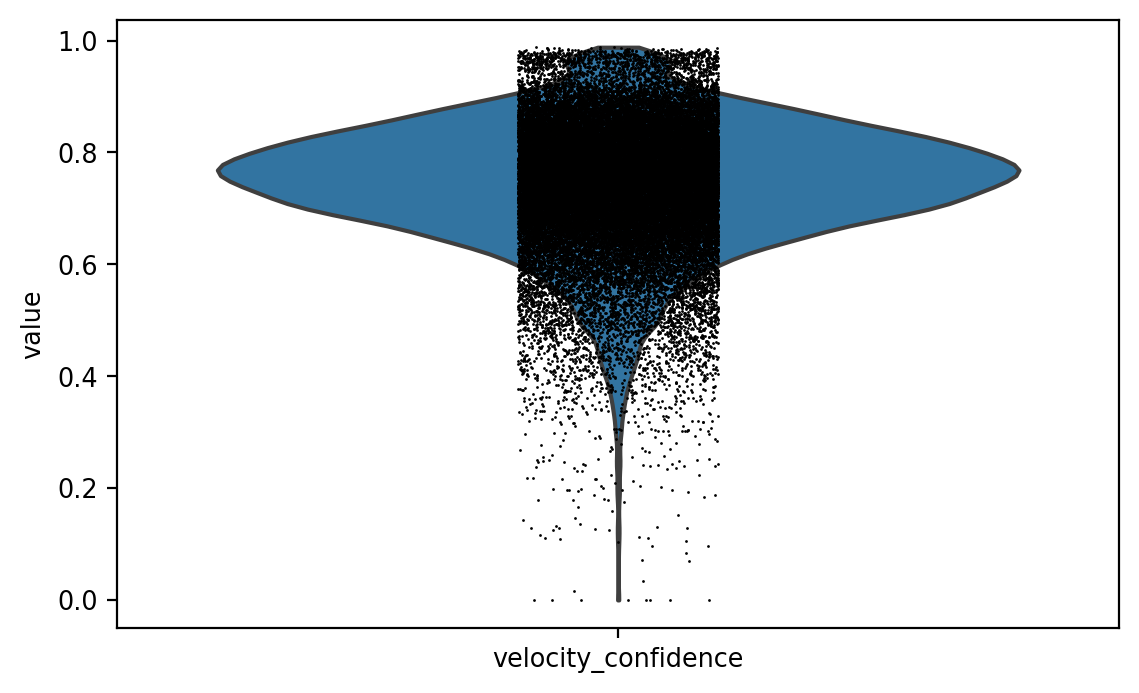

In [26]:
sc.pl.violin(adata, keys='velocity_confidence')

In [27]:
#adata.write("/home/icb/jonas.flor/precomputed_data/scvelo_larry_pre.h5ad")